<a href="https://colab.research.google.com/github/Abhinavl3v3l/EVA3/blob/master/Assignment4_13.9Kpara9945.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist                                                # Importing Necessary Libraries and dataset(in keras)

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()                        # mnist data divided into Training and Test Data
                                                                                # Where X_train are 60K 28x28 gray scale training images of numbers from [0-9] 
                                                                                # y_train are label of numbers from [0-9]

(60000, 28, 28)


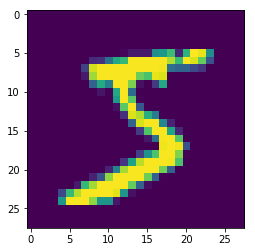

In [51]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])                                                           # Displaying what one of the images look like.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)                           # (60000, 28, 28) ->  (60000, 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')                                             # Convert to float type
X_test = X_test.astype('float32') 
X_train /= 255
X_test /= 255                                                                   # Floating Value ranges from [0,1]

In [54]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)                                  
Y_test = np_utils.to_categorical(y_test, 10)

In [56]:
Y_train[:10]                                                                    ## y_train to Y_train  - example,5 value is converted to an array where 5th element of array is 1(lit) and rest all is 0 
                                                                                
                                                                                # OR 
                                                                                
                                                                                # 1 Hot Encoded  


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### This assignment's code is divided into 4 parts. 

1.    Architecture( remains constant).
2.    Kernel Optimization to fit under 15K constraint.
3.    Go Crazy (Batch Normalization, Drop Out, Learning Rate, Batch Size).
4.    Accuracy above 99.4% (if possible less than 15 epochs)

#### Guidelines
1.    Make sure you are tracking your code's performance, and writing down your observations as you achieve better or worse results
2.    Your second code can only have max 2 improvements over first one, third can have only max 2 over second and so on. 
3.    All of your iterations are in different CODE BLOCKS and named properly like First CODE, Second CODE, etc
4.    All of your iterations have a Header note, describing what all you are planning to do in this code
5.    All of your code is very well documented
6.    There is a readme file (or embedded documentation) describing your codes and steps you've taken




# CODE 1 - Architecture

In [0]:
# from keras.layers import Activation
# model = Sequential()
 
# model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Convolution2D(16, 3, 3, activation='relu')) #24
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Convolution2D(10, 1, 1, activation='relu')) #24

# model.add(MaxPooling2D(pool_size=(2, 2)))#12

# model.add(Convolution2D(16, 3, 3, activation='relu'))#10
# model.add(BatchNormalization())
# model.add(Dropout(0.1))


# model.add(Convolution2D(16, 3, 3, activation='relu'))#8
# model.add(BatchNormalization())
# model.add(Dropout(0.1))


# model.add(Convolution2D(16, 3, 3, activation='relu'))#6
# model.add(BatchNormalization())
# model.add(Dropout(0.1))


# model.add(Convolution2D(16, 3, 3, activation='relu'))#4
# model.add(BatchNormalization())
# model.add(Dropout(0.1))


# model.add(Convolution2D(10, 4))


# model.add(Flatten())
# model.add(Activation('softmax'))


# model.summary()

In [58]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(16, 3, 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#6
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#4
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
#keras.layers.AveragePooling2D(pool_size=(4, 4))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 12)        48        
_________________________________________________________________
dropout_13 (Dropout)         (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 20)        2180      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 20)        80        
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 20)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 10)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [59]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 14s 225us/step - loss: 0.2295 - acc: 0.9276 - val_loss: 0.0501 - val_acc: 0.9839
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 10s 165us/step - loss: 0.0636 - acc: 0.9802 - val_loss: 0.0363 - val_acc: 0.9872
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 10s 165us/step - loss: 0.0500 - acc: 0.9845 - val_loss: 0.0302 - val_acc: 0.9904
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 10s 164us/step - loss: 0.0414 - acc: 0.9869 - val_loss: 0.0353 - val_acc: 0.9888
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)                               # Evaluate the Model over test data

In [61]:
print(score)                                                                    # Accuracy over test data.

[0.01721790532943851, 0.9946]


In [0]:
y_pred = model.predict(X_test)                                                  # predicting the values with validation accuracy

In [63]:
print(y_pred[:9])                                                               
print(y_test[:9])

[[1.1403094e-12 3.6421027e-10 4.5382151e-10 4.0336442e-08 2.9477661e-14
  3.7046013e-12 1.6647811e-14 1.0000000e+00 1.2076657e-13 3.8236618e-09]
 [1.5967699e-06 2.1466110e-07 9.9999785e-01 1.8191425e-08 8.8961478e-09
  1.8916799e-13 3.0754677e-07 1.0159458e-10 5.9394617e-10 7.9475398e-11]
 [4.2112514e-08 9.9993396e-01 5.8813742e-07 1.7791362e-09 1.3714576e-05
  1.0379633e-08 3.5251114e-06 4.7880720e-05 2.2439357e-07 8.3844235e-08]
 [9.9999273e-01 3.3875827e-10 4.1853134e-08 1.7064566e-10 6.4614660e-08
  2.5563454e-10 6.7054516e-06 6.9829870e-10 1.4569932e-07 3.1035336e-07]
 [9.7431219e-09 2.0447860e-10 2.5412875e-08 3.7022480e-10 9.9999297e-01
  6.0919514e-09 3.2630143e-07 4.3798433e-08 5.4196612e-08 6.6030311e-06]
 [2.2211879e-08 9.9992764e-01 3.0302465e-07 2.7415481e-10 3.3383917e-06
  5.3315219e-09 1.6040570e-06 6.6955930e-05 8.2051095e-08 8.2025757e-08]
 [2.3793461e-09 1.3876877e-06 1.7163760e-09 1.8880604e-09 9.9996698e-01
  6.9259229e-08 4.7899860e-08 2.4544441e-05 1.1358817e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

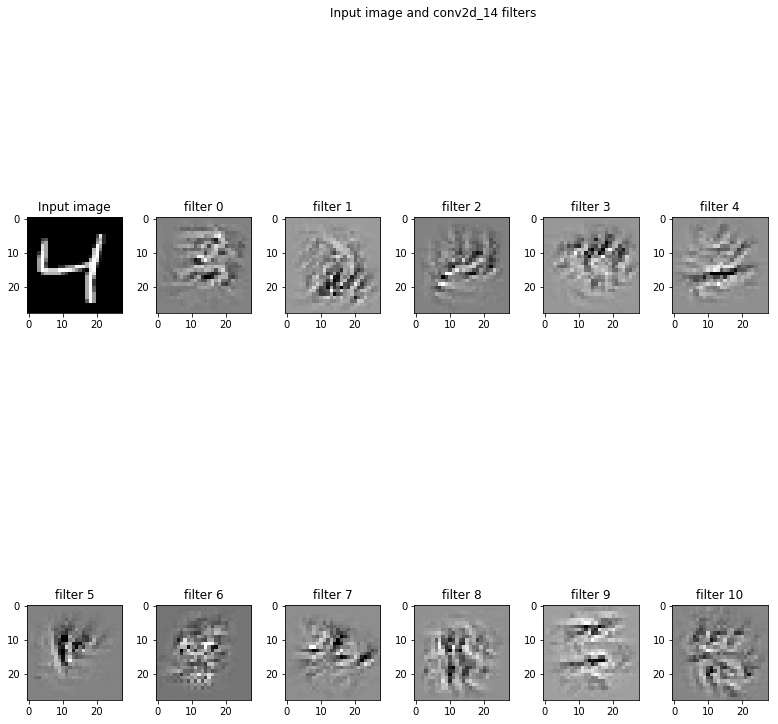

KeyError: ignored

In [65]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()